# 🔢 Positional Encoding 〰️
---

*COSCI 223 - Machine Learning 3*

*Prepared by Sebastian C. Ibañez*

<a href="https://colab.research.google.com/github/aim-msds/msds2023-ml3/blob/main/notebooks/transformer/02-positional-encoding.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="float: left;"></a><br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [2]:
seq_len = 5_000

pos = torch.arange(seq_len, dtype=torch.long)
pos = pos.view(-1, 1) # shape is (seq_len, batch_size)

print(pos.shape)
print(pos)

torch.Size([5000, 1])
tensor([[   0],
        [   1],
        [   2],
        ...,
        [4997],
        [4998],
        [4999]])


\begin{align*}
    \text{PE}_{(\text{pos}, 2i)} &= \sin(\text{pos}/10000^{2i/d_{\text{model}}})\\
    \text{PE}_{(\text{pos}, 2i+1)} &= \cos(\text{pos}/10000^{2i/d_{\text{model}}})
\end{align*}

In [3]:
max_len = seq_len
d_model = 4

pe = torch.zeros(max_len, 1, d_model)
pe[:, 0, 0::2] = torch.sin(pos/(10_000.**(torch.arange(0, d_model, 2)/d_model)))
pe[:, 0, 1::2] = torch.cos(pos/(10_000.**(torch.arange(0, d_model, 2)/d_model)))

print(pe.shape)
print(pe)

torch.Size([5000, 1, 4])
tensor([[[ 0.0000,  1.0000,  0.0000,  1.0000]],

        [[ 0.8415,  0.5403,  0.0100,  0.9999]],

        [[ 0.9093, -0.4161,  0.0200,  0.9998]],

        ...,

        [[ 0.9563, -0.2925, -0.2912,  0.9567]],

        [[ 0.2705, -0.9627, -0.2816,  0.9595]],

        [[-0.6639, -0.7478, -0.2720,  0.9623]]])


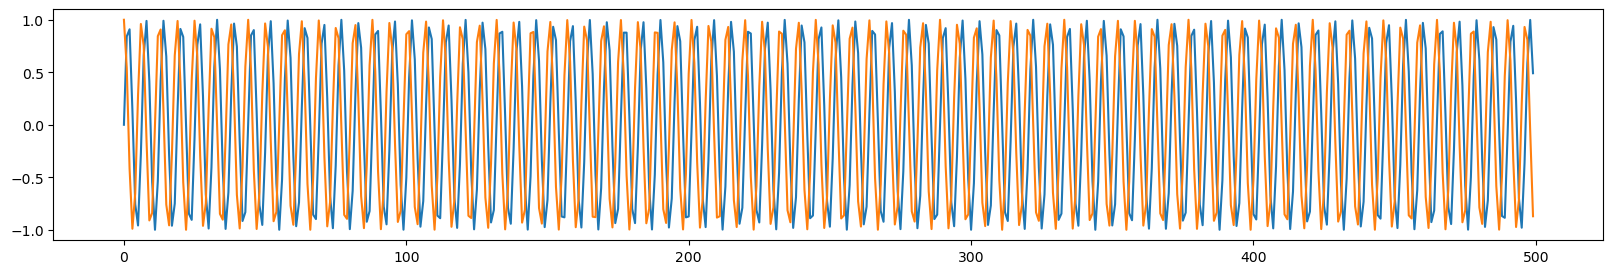

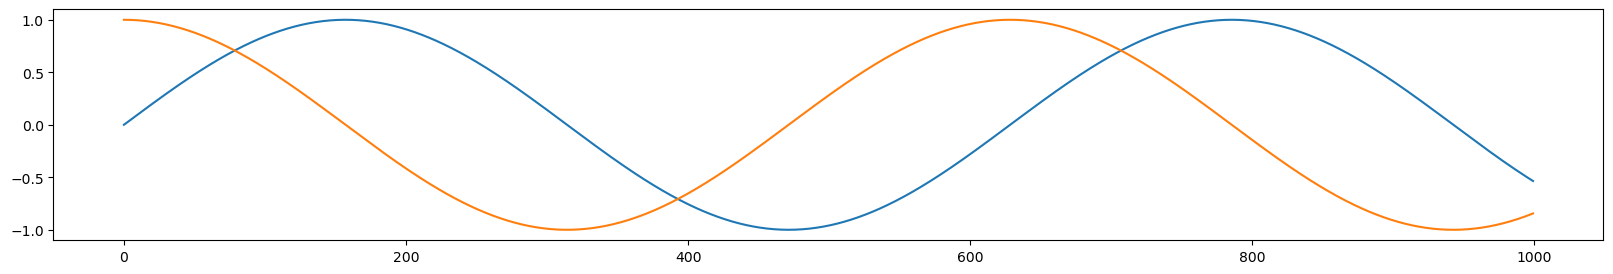

In [4]:
fig = plt.figure(figsize=(20, 3))
plt.plot(pe.squeeze().numpy()[:500, :2])
plt.show()

fig = plt.figure(figsize=(20, 3))
plt.plot(pe.squeeze().numpy()[:1000, 2:])
plt.show()

## References
---

- https://pytorch.org/tutorials/beginner/transformer_tutorial.html

- http://nlp.seas.harvard.edu/annotated-transformer/